In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import numpy as np

import scipy
from scipy.optimize import curve_fit
import seaborn as sns


import spacy
from spacy import displacy
import scattertext

from scipy import stats

import spacy

from wordcloud import WordCloud, STOPWORDS


In [2]:
df = pd.read_csv('train.csv')    
df_pos = df.loc[df['target'] == 1]
df_neg = df.loc[df['target'] == 0]

In [3]:
stopwords = set(STOPWORDS)
test = list(stopwords)
display(df)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


Text(0.5, 1.0, 'Keywords When there is a Natural Disaster')

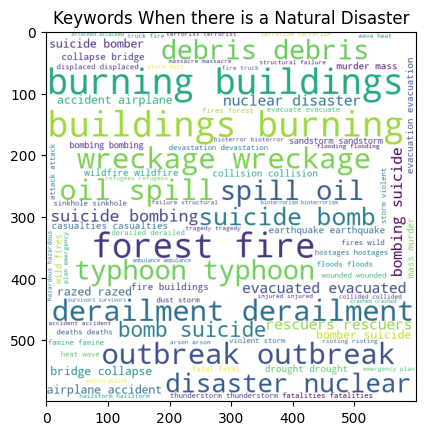

In [4]:
allText = ""

for i in df_pos['keyword']:
    i = str(i)
    i = i.replace("%20", " ")
    i = i.replace("nan", "")
    words = i.split()
    allText = allText + " ".join(words) + " "

wordcloud = WordCloud(height = 600, width = 600, background_color = 'white', min_font_size=8).generate(allText)

plt.imshow(wordcloud)
plt.title("Keywords When there is a Natural Disaster")
        

Text(0.5, 1.0, 'Keywords When there is No Natural Disaster')

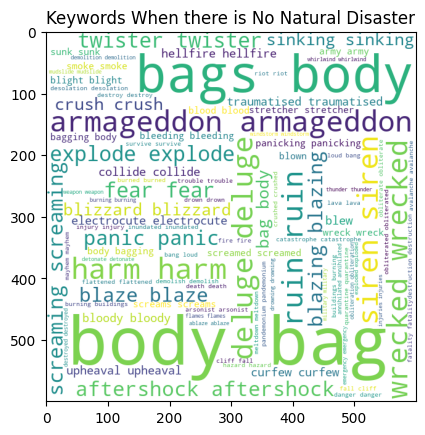

In [5]:
allText = ""

for i in df_neg['keyword']:
    i = str(i)
    i = i.replace("%20", " ")
    i = i.replace("nan", "")
    words = i.split()
    allText = allText + " ".join(words) + " "

wordcloud = WordCloud(height = 600, width = 600, background_color = 'white', min_font_size=8).generate(allText)

plt.imshow(wordcloud)
plt.title("Keywords When there is No Natural Disaster")
        

In [6]:
print(stopwords)

{"they'll", 'during', 'do', 'such', 'be', 'ever', 'up', 'our', 'under', 'when', "haven't", "she's", "hasn't", 'whom', 'hers', "we'll", 'www', "i'll", 'then', "won't", 'her', "you've", 'out', "you'll", 'most', 'or', 'should', 'off', 'himself', 'to', 'until', 'why', "don't", 'like', 'she', 'since', 'otherwise', 'shall', 'and', 'cannot', 'with', 'com', 'all', 'where', "they're", 'between', 'yourself', 'before', 'ours', 'just', "you'd", "why's", 'are', 'both', "she'd", 'hence', "they'd", 'through', 'yourselves', 'k', "i've", 'but', 'here', "i'm", 'themselves', 'ought', 'too', "mustn't", "aren't", "he'll", "we've", 'was', "hadn't", 'also', 'i', 'on', 'which', 'for', 'have', 'herself', 'how', 'own', 'only', 'what', "wouldn't", 'again', 'yours', "weren't", "let's", "he's", 'no', 'could', "shan't", 'than', 'down', 'myself', "shouldn't", 'these', "it's", 'http', 'itself', 'so', 'them', 'who', 'he', 'as', 'same', 'doing', 'more', 'not', 'did', 'your', 'any', 'r', 'into', "wasn't", "isn't", 'is',

In [7]:
word_count = df['keyword'].value_counts()

In [8]:
print(word_count[0:10].values)

[45 42 42 41 41 41 41 40 40 40]


<BarContainer object of 10 artists>

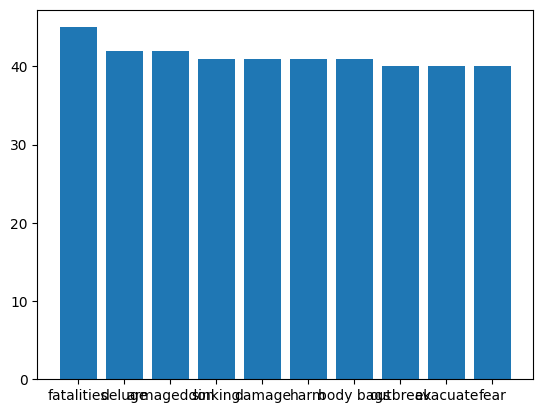

In [9]:
x = ['fatalities', 'deluge', 'armageddon', 'sinking', 'damage', 'harm', 'body bags', 'outbreak', 'evacuate', 'fear']
bar_labels = ['tab:fatalities', 'tab:deluge', 'tab:armageddon', 'tab:sinking', 'tab:damage', 'tab:harm', 'tab:body bags', 'tab:outbreak', 'tab:evacuate', 'tab:fear']
plt.bar(x, word_count[0:10].values, label = bar_labels)

In [10]:
word_count_pos = df_pos['keyword'].value_counts()
word_count_neg = df_neg['keyword'].value_counts()

<BarContainer object of 10 artists>

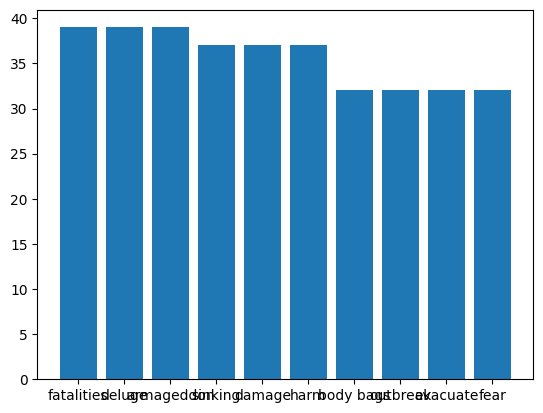

In [11]:
plt.bar(x, word_count_pos[0:10].values, label = bar_labels)

<BarContainer object of 10 artists>

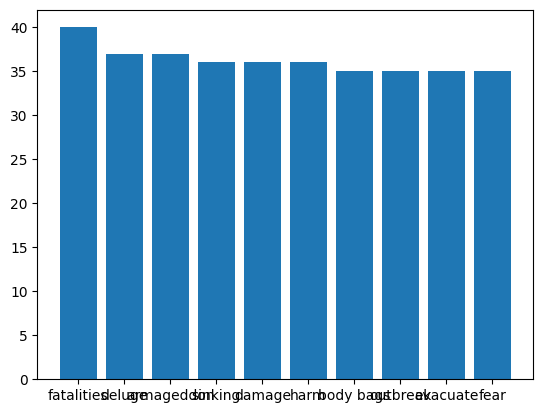

In [12]:
plt.bar(x, word_count_neg[0:10].values, label = bar_labels)

In [13]:
avg_values = df.groupby('location')['target'].mean().to_frame()
print(avg_values)

                        target
location                      
                           1.0
  Glasgow                  0.0
  Melbourne, Australia     0.0
  News                     1.0
  å_                       0.0
...                        ...
å_: ?? ÌÑ ? : ?            0.0
å_å_Los Mina Cityã¢       0.0
å¡å¡Midwest Û¢Û¢         0.0
åÊ(?Û¢`?Û¢å«)??          0.0
åø\_(?)_/åø                1.0

[3341 rows x 1 columns]


location
California, United States    0.166667
NYC                          0.166667
Brooklyn, NY                 0.166667
Vancouver, BC                0.200000
San Jose, CA                 0.200000
Name: target, dtype: float64


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

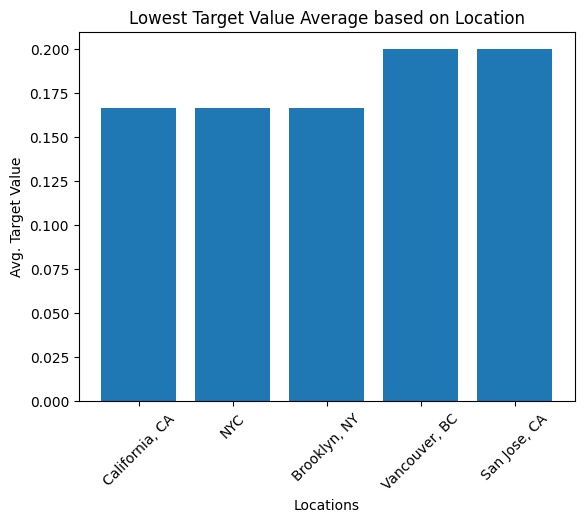

In [14]:
avg_val = avg_values[avg_values > 0]
avg_val = avg_val[avg_values < 1.0]
# avg_val.remove(float("NaN"))
avg_val = avg_val.dropna()
avg_val = avg_val['target'].sort_values()
print(avg_val[3:8])
x_val_l = ['California, CA', 'NYC', 'Brooklyn, NY', 'Vancouver, BC', 'San Jose, CA']
y_val_l = [0.166667, 0.166667, 0.166667, 0.2, 0.2]
plt.bar(x_val_l, y_val_l)
plt.title("Lowest Target Value Average based on Location")
plt.xlabel('Locations')
plt.ylabel('Avg. Target Value')
plt.xticks(rotation=45)

location
Melbourne, Australia        0.800000
WorldWide                   0.800000
Lagos, Nigeria              0.800000
Puerto Rico                 0.800000
The Netherlands             0.800000
Oklahoma City, OK           0.833333
Pedophile hunting ground    0.833333
India                       0.833333
Paterson, New Jersey        0.833333
Mumbai                      0.863636
Name: target, dtype: float64


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

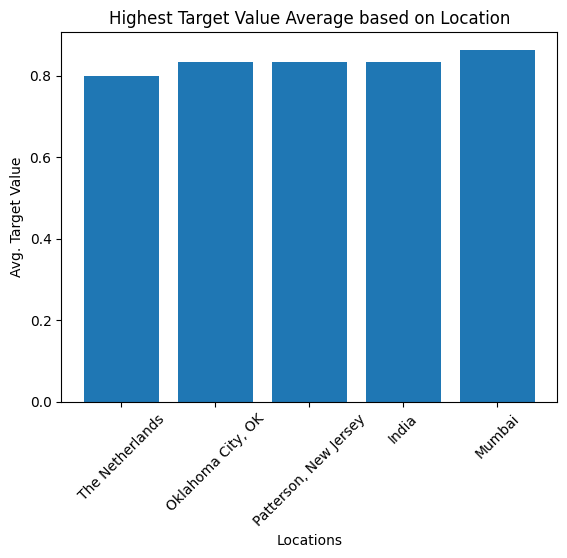

In [15]:
print(avg_val[304:])
x_val_h = ['The Netherlands', 'Oklahoma City, OK', 'Patterson, New Jersey', 'India', 'Mumbai']
y_val_h = [0.8, 0.8333333, 0.8333333, 0.8333333, 0.863636]
plt.bar(x_val_h, y_val_h)
plt.title("Highest Target Value Average based on Location")
plt.xlabel('Locations')
plt.ylabel('Avg. Target Value')
plt.xticks(rotation=45)

In [16]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load a pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"  # Change to the desired model name
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
import torch

torch.manual_seed(42)
np.random.seed(42)

df = pd.read_csv('train.csv') 

del df['id']
del df['location']

# Create an empty list to store sentiment scores
positive_scores = []
negative_scores = []

max_length = 0
for text in df['text']:
    max_length = max(max_length, len(text))

df['negative_likelihood'] = None
df['positive_likelihood'] = None

# Loop through each tweet in the DataFrame
for i, text in enumerate(df['text']):
    # Tokenize the tweet
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=max_length)
    
    # Get model predictions for sentiment scores (logits means raw sentiment scores)
    with torch.no_grad():
        outputs = model(input_ids=inputs['input_ids']).logits
    
    # Assuming your model is configured for binary classification (positive/negative)
    probabilities = torch.softmax(outputs, dim=1)

    df.at[i, 'negative_likelihood'] = probabilities[:, 0].item()
    df.at[i, 'positive_likelihood'] = probabilities[:, 1].item()  # Assuming 1 is the positive class

df['sentiment_score'] = df['positive_likelihood'] - df['negative_likelihood']

display(df.head())


,keyword,text,target,negative_likelihood,positive_likelihood,sentiment_score
0,NaN,Our Deeds are the Reason of this #earthquake M...,1,0.622564,0.377436,-0.245128
1,NaN,Forest fire near La Ronge Sask. Canada,1,0.577911,0.422089,-0.155823
2,NaN,All residents asked to 'shelter in place' are ...,1,0.626634,0.373366,-0.253268
3,NaN,"13,000 people receive #wildfires evacuation or...",1,0.604971,0.395029,-0.209942
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0.606837,0.393163,-0.213675


In [18]:
temp_keyword_list = dict()
for i in df_pos['keyword']:
    i = str(i)
    i_key = i.lower()
    i_key = i_key.replace('%20',' ')
    if i_key != "nan":
        if i_key.replace('%20',' ') in temp_keyword_list:
            temp_keyword_list[i_key] = temp_keyword_list[i_key] + 1
        else:
            temp_keyword_list[i_key] = 1

temp_keyword_neg = dict()
for i in df_neg['keyword']:
    i = str(i)
    i_key = i.lower()
    i_key = i_key.replace('%20',' ')
    if i_key != "nan":
        if i_key in temp_keyword_neg:
            temp_keyword_neg[i_key] = temp_keyword_neg[i_key] + 1
        else:
            temp_keyword_neg[i_key] = 1
uniq_keyword_list = []

for key, value in temp_keyword_list.items():
    if (key in temp_keyword_neg and value > temp_keyword_neg[key]) or key not in temp_keyword_neg:
        uniq_keyword_list.append(key)

freq_keyword_list = []
for i in df['text']:
    temp_count = 0
    for j in uniq_keyword_list:
        temp_count = temp_count + i.lower().count(j)
    freq_keyword_list.append(temp_count/len(i.split()))

#u do this how u want but i did this
df['keyword freq.'] = freq_keyword_list


display(df.head())

,keyword,text,target,negative_likelihood,positive_likelihood,sentiment_score,keyword freq.
0,NaN,Our Deeds are the Reason of this #earthquake M...,1,0.622564,0.377436,-0.245128,0.076923
1,NaN,Forest fire near La Ronge Sask. Canada,1,0.577911,0.422089,-0.155823,0.142857
2,NaN,All residents asked to 'shelter in place' are ...,1,0.626634,0.373366,-0.253268,0.045455
3,NaN,"13,000 people receive #wildfires evacuation or...",1,0.604971,0.395029,-0.209942,0.250000
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0.606837,0.393163,-0.213675,0.062500


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score

X = df[['sentiment_score', 'keyword freq.']]
y = df['target']

# Initialize the logistic regression model
clf = LogisticRegression()

# Define a 5-fold cross-validation strategy as an example
cv = 5

# Create custom scoring functions for precision and recall
custom_scorer_precision = make_scorer(precision_score)
custom_scorer_recall = make_scorer(recall_score)

# Perform cross-validation and calculate accuracy, precision, and recall
accuracy_scores = cross_val_score(clf, X, y, cv=cv)
precision_scores = cross_val_score(clf, X, y, cv=cv, scoring=custom_scorer_precision)
recall_scores = cross_val_score(clf, X, y, cv=cv, scoring=custom_scorer_recall)

# Report the mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy: {accuracy_scores.mean()}")
print(f"Mean Precision: {precision_scores.mean()}")
print(f"Mean Recall: {recall_scores.mean()}")


Mean Accuracy: 0.6942152004783421
Mean Precision: 0.7386304604068881
Mean Recall: 0.45522468893713375


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import heapq

# Create a DataFrame to store hashtag frequencies
hashtag_dict = {}

# Loop through each tweet in the DataFrame
for text in df['text']:
    hashtags = re.findall(r'#\w+', text)  # Extract hashtags using regex
    for hashtag in hashtags:
        hashtag = hashtag.lower()  # Convert to lowercase for case-insensitive counting
        if hashtag not in hashtag_dict:
            hashtag_dict[hashtag] = 0
        hashtag_dict[hashtag] += 1

heap = []
heapq.heapify(heap)
# top k hashtag frequencies
k = 5

for key, val in hashtag_dict.items():
    heapq.heappush(heap, (val, key))

    if len(heap) > k:
        heapq.heappop(heap)



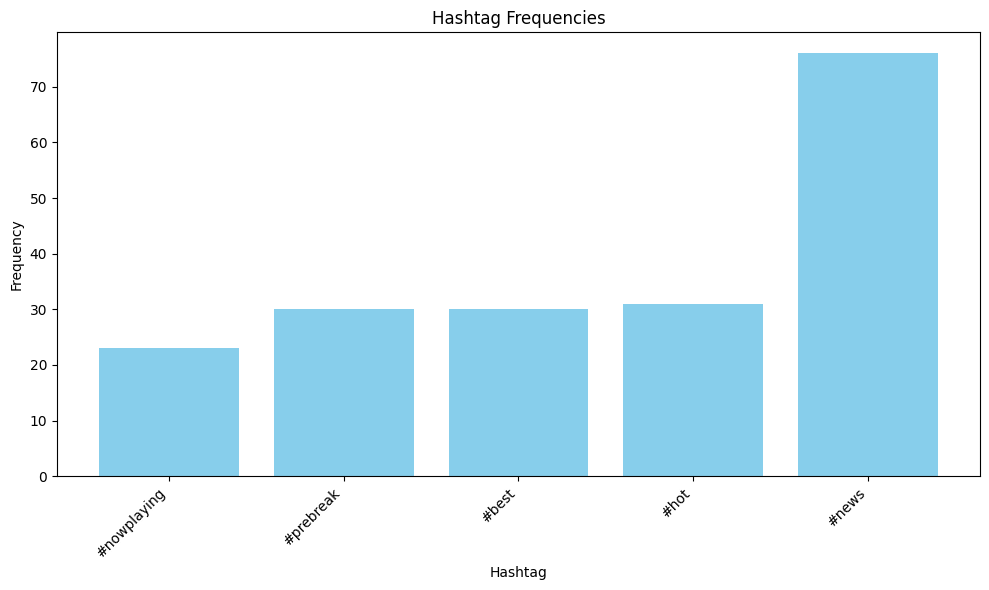

In [21]:
# Extract frequencies and hashtags
frequencies, hashtags = zip(*heap)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(hashtags, frequencies, color='skyblue')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.title('Hashtag Frequencies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Display the plot
plt.tight_layout()
plt.show()


[1 1 0 ... 1 1 1]


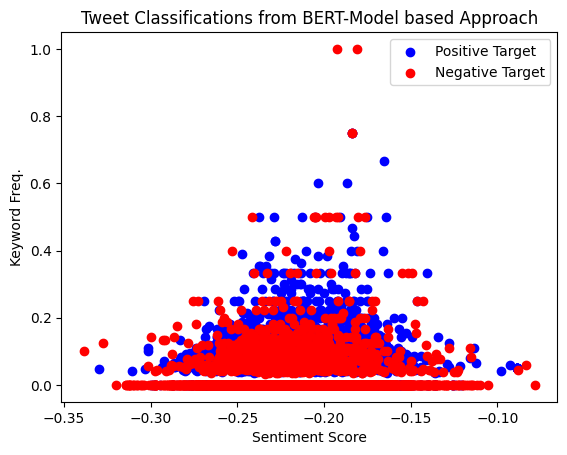

In [25]:
l_model = LogisticRegression(solver='liblinear', random_state=0)

x_val, y_val = X, y

clf.fit(x_val, y_val)
print(clf.predict(x_val))

df_pos_val = df.loc[df['target'] == 1]
df_neg_val = df.loc[df['target'] == 0]
 
x_val_pos = df_pos_val['sentiment_score']
x_val_neg = df_neg_val['sentiment_score']

x_val_pos_k = df_pos_val['keyword freq.']
x_val_neg_k = df_neg_val['keyword freq.']

plt.scatter(x_val_pos.values, x_val_pos_k.values, color='blue', label='Positive Target')
plt.scatter(x_val_neg.values, x_val_neg_k.values, color='red', label='Negative Target')
plt.xlabel('Sentiment Score')
plt.ylabel('Keyword Freq.')
plt.title('Tweet Classifications from BERT-Model based Approach')
plt.legend()